In [3]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
x=7
print(x*12)

84


In [19]:
import pandas as pd
names = ['6 años -  0 - 3', '6 años -  4 - 7', '6 años -  8 - 11', '7 años -  0 - 3', '7 años - 4 - 7', '7 años - 8 - 11', '8 años - 0 - 5', '8 años - 6 - 11', '9 años - 0 - 5', '9 años - 6 -11', '10 años - 0 - 5', '10 años - 6 -11', '11 años', '12 años', '13 años', '14 años', '15 años', '16 años']

ages_months = [72, 76, 80, 84, 88, 92, 96, 102, 108, 114, 120, 126, 132, 144, 156, 168, 180, 192] 
# Load the Excel file
excel_file = pd.ExcelFile('baremoswisc.xlsx')
baremos = pd.DataFrame()

for i in enumerate(names):
    print(i[1])
    df = pd.read_excel(excel_file, sheet_name=i[1])
    df['Edad (meses)'] = ages_months[i[0]]
    baremos = pd.concat([baremos, df], ignore_index=True)

baremos

# # List all sheet names
# print(excel_file.sheet_names)
# # Replace 'file_path.xlsx' with the path to your .xlsx file
# df = pd.read_excel('baremoswisc.xlsx')
# df

6 años -  0 - 3
6 años -  4 - 7
6 años -  8 - 11
7 años -  0 - 3
7 años - 4 - 7
7 años - 8 - 11
8 años - 0 - 5
8 años - 6 - 11
9 años - 0 - 5
9 años - 6 -11
10 años - 0 - 5
10 años - 6 -11
11 años
12 años
13 años
14 años
15 años
16 años


,Puntuación natural,DC,SE,RD,CD,CL,VB,NL,MT,CM,BS,FI,RG,IN,AR,PC,Edad (meses)
0,0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,72
1,1,2.0,3.0,2.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,1,2.0,2.0,2.0,72
2,2,3.0,4.0,2.0,3.0,1.0,2.0,4.0,3.0,2.0,3.0,3.0,1,3.0,3.0,3.0,72
3,3,4.0,5.0,3.0,4.0,1.0,3.0,5.0,4.0,3.0,4.0,4.0,1,4.0,4.0,4.0,72
4,4,5.0,6.0,4.0,5.0,2.0,4.0,6.0,5.0,4.0,5.0,4.0,1,5.0,5.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,192
2462,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,192
2463,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,192
2464,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,192


In [22]:
def find_age(age, available_ages):
    # Check if the age is out of bounds
    if age < min(available_ages):
        print(f"Warning: The requested age {age} is below the lowest available age {min(available_ages)}.")
    elif age > max(available_ages) + 12:
        print(f"Warning: The requested age {age} is greater than the highest available age {max(available_ages)} plus 12 months.")

    # Find the nearest floor age
    floor_age = max([a for a in available_ages if a <= age], default=None)

    # Check if the difference between requested age and nearest age is greater than 12
    if floor_age is not None and abs(age - floor_age) > 12:
        print(f"Warning: The difference between the requested age {age} and the nearest available age {floor_age} is greater than 12 months.")

    return floor_age

In [29]:
def get_scalar(edad_meses, available_ages, puntuacion, prueba, baremos):
    nearest_age = find_age(edad_meses, available_ages)
    if nearest_age is None:
        return None
    if puntuacion is None:
        print(f"No natural score provided for age {edad_meses} in test {prueba}.")
        return None

    puntuacion_escalar = baremos[(baremos['Edad (meses)'] == nearest_age) & 
                                 (baremos['Puntuación natural'] == puntuacion)][prueba].values
    if len(puntuacion_escalar) == 0:
        print(f"No scalar score found for age {edad_meses} and natural score {puntuacion} in test {prueba}.")
        return None
    return puntuacion_escalar[0]

edad_meses = 87
puntuacion = 17
prueba = 'RD'
available_ages = baremos['Edad (meses)'].unique()

scalar = get_scalar(edad_meses, available_ages, puntuacion, prueba, baremos)
if scalar is not None:
    print(f"The scalar score for age {edad_meses} with natural score {puntuacion} in test {prueba} is: {scalar}")

The scalar score for age 87 with natural score 17 in test RD is: 15.0


In [67]:
form = pd.read_excel('Datos para informe.xlsx')
form

,Item,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,NaN,Dia,Mes,Año,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fecha de nacimiento,22,2,2015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fecha de prueba,28,7,2025,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Género,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Escolaridad padres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,WISC - 4,Semejanzas,Vocabulario,Comprensión,Información,Diseño con cubos,Conceptos con dibujos,Matrices,Figuras incompletas,Retención de dígitos - directos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Puntaje normal,21,21,21,21,21,21,21,21,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ENI - 2 / Habilidades visoconstructivas y memo...,Dibujo de la figura humana,Copia de figuras,Lista de palabras - Ensayos,Lista de palabras - Recobro espontáneo,Lista de palabras - Recobro por claves,Lista de palabras - Reconocimiento,Lista de figuras-Ensayos,Lista de figuras-Recobro Espontáneo,Lista de figuras-Recobro por claves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Puntaje normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:

birth_date = pd.to_datetime(f"{form.at[1,3]}-{form.at[1,2]}-{form.at[1,1]}")
print(f'Fecha de nacimiento: {birth_date.strftime("%Y-%m-%d")}')
test_date = pd.to_datetime(f"{form.at[2,3]}-{form.at[2,2]}-{form.at[2,1]}")
print(f'Fecha de la prueba: {test_date.strftime("%Y-%m-%d")}')
age_at_test = (test_date.year - birth_date.year) * 12 + (test_date.month - birth_date.month)  # Convert days to months
print(f"Edad en meses al momento de la prueba: {age_at_test} meses")

Fecha de nacimiento: 2018-02-22
Fecha de la prueba: 2025-07-28
Edad en meses al momento de la prueba: 89 meses


In [36]:
age_at_test = (test_date.year - birth_date.year) * 12 + (test_date.month - birth_date.month)
print(f"Age at test in months: {age_at_test} months")

Age at test in months: 89 months


In [59]:
wisc_tests = {
    'Semejanzas': ['SE', [7, 1]],
    'Vocabulario': ['VB', [7, 2]],
    'Comprensión': ['CM', [7, 3]],
    'Información': ['IN', [7, 4]],
    'Diseño con cubos': ['DC', [7, 5]],
    'Conceptos con dibujos': ['CD', [7, 6]],
    'Matrices': ['MT', [7, 7]],
    'Figuras incompletas': ['FI', [7, 8]],
    'Retención de dígitos': ['RD', ([7, 9], [7, 10])],
    'Letras y números': ['NL', [7, 11]],
    'Aritmética': ['AR', [7, 12]],
    'Claves' : ['CL', [7, 13]],
    'Búsqueda de símbolos': ['BS', [7, 14]],
}

def all_tests(tests, baremos, form, age_at_test=None, messages=None):
    results = {}

    for test, test_info in tests:
        if test_info[0] not in baremos.columns:
            messages.append(f"Prueba {test} no encontrada en los baremos.")
        
            continue
        if isinstance(test_info[1], list):
            puntuacion = form.at[test_info[1][0],test_info[1][1] ]  # Assuming the natural score is in the second row
        elif isinstance(test_info[1], tuple):
            puntuacion = form.at[test_info[1][0][0], test_info[1][0][1],] + form.at[test_info[1][1][0], test_info[1][1][1]]
        if pd.isna(puntuacion):
            messages.append(f"No se proporcionó puntuación natural para la prueba {test}.")
            continue
        scalar = get_scalar(age_at_test, baremos['Edad (meses)'].unique(), puntuacion, test_info[0], baremos)
        if scalar is not None:
            results[test] = scalar
    return results, messages

In [68]:
messages = []
results, messages = all_tests(wisc_tests.items(), baremos, form, age_at_test, messages)

In [77]:
excel_file = pd.ExcelFile('baremoswisc.xlsx')
names = excel_file.sheet_names
names = names[19:22]
print(names)

excel_file = pd.ExcelFile('baremoswisc.xlsx')
baremos_idx = pd.read_excel(excel_file, sheet_name='ICV')
columnas_ICV ={'Puntuación escalar': 'Puntuación escalar', 'ICV':'ICV','Rango percentil':'Rango percentil_ICV', 'Confianza 95':'Confianza 95_ICV' }  # Initialize with the first column
baremos_idx.rename(columns=columnas_ICV, inplace=True)

for i in enumerate(names):
    print(i[1])
    baremos_idx = pd.merge(baremos_idx, pd.read_excel(excel_file, sheet_name=i[1]), how='outer', on='Puntuación escalar', suffixes=('', f'_{i[1]}'))
    # df = pd.read_excel(excel_file, sheet_name=i[1])
    # df['indice'] = 
    # baremos_idx = pd.concat([baremos, df], ignore_index=True)
cit_baremos = pd.read_excel(excel_file, sheet_name='CIT')
cit_baremos['Puntuación escalar'] = cit_baremos['Suma puntuaciones escalares'].astype(int)
baremos_idx = pd.merge(baremos_idx, cit_baremos, how='outer', on='Puntuación escalar', suffixes=('', '_CIT'))

columnas_IRP ={'Rango percentil': 'Rango percentil_IRP', 'Confianza 95':'Confianza 95_IRP'}
baremos_idx.rename(columns=columnas_IRP, inplace=True)

baremos_idx.to_csv('baremoswisc_indices.csv', index=False)  # Save the merged DataFrame to a CSV file
baremos_idx

['IRP', 'IMT', 'IVP']
IRP
IMT
IVP


,Puntuación escalar,ICV,Rango percentil_ICV,Confianza 95_ICV,IRP,Rango percentil_IRP,Confianza 95_IRP,IMT,Rango percentil_IMT,Confianza 95_IMT,IVP,Rango percentil_IVP,Confianza 95_IVP,Suma puntuaciones escalares,CIT,Rango percentil_CIT,Confianza 95_CIT
0,2,NaN,NaN,NaN,NaN,NaN,NaN,50.0,"< 0,1",46-62,50.0,"< 0,1",47-65,NaN,NaN,NaN,NaN
1,3,45.0,"< 0,1",42-55,45.0,"< 0,1",42-57,52.0,0.1,48-63,53.0,0.1,50-68,NaN,NaN,NaN,NaN
2,4,47.0,"< 0,1",43-57,47.0,"< 0,1",44-59,54.0,0.1,50-65,56.0,0.2,52-70,NaN,NaN,NaN,NaN
3,5,50.0,"< 0,1",46-60,49.0,"< 0,1",45-61,56.0,0.2,52-67,59.0,0.3,55-73,NaN,NaN,NaN,NaN
4,6,53.0,0.1,49-63,51.0,0.1,47-63,59.0,0.3,55-70,62.0,1,58-76,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,159.0,"> 99,9",152-162
185,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.0,160.0,"> 99,9",153-163
186,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.0,160.0,"> 99,9",153-163
187,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,160.0,"> 99,9",153-163


In [69]:
results

{'Semejanzas': np.float64(15.0),
 'Vocabulario': np.float64(10.0),
 'Comprensión': np.float64(13.0),
 'Información': np.float64(19.0),
 'Diseño con cubos': np.float64(11.0),
 'Conceptos con dibujos': np.float64(17.0),
 'Matrices': np.float64(16.0),
 'Figuras incompletas': np.float64(12.0),
 'Retención de dígitos': np.float64(13.0),
 'Letras y números': np.float64(7.0),
 'Aritmética': np.float64(16.0),
 'Claves': np.float64(5.0),
 'Búsqueda de símbolos': np.float64(9.0)}

In [79]:
def wisc_indexes(results, baremos_idx, messages):
    #icv = semejanzas + vocab + compren
    icv_1 = [results.get('Semejanzas', 0), results.get('Vocabulario', 0), results.get('Comprensión', 0)]
    min_icv = min(icv_1)
    max_icv = max(icv_1)
    if max_icv - min_icv > 4:
        messages.append(f"Advertencia: La diferencia entre el ICV máximo {max_icv} y el ICV mínimo {min_icv} es mayor que 4. Cambiando el mínimo por el valor de información")
        icv_2 = icv_1.copy()
        icv_2[icv_1.index(min_icv)] = results.get('Información', 0)  # Replace the minimum with the value of 'Información'
        min_icv = min(icv_2)
        max_icv = max(icv_2)
        if max_icv - min_icv > 4:
            messages.append(f"Advertencia: La diferencia entre el ICV máximo {max_icv} y el ICV mínimo {min_icv} sigue siendo mayor que 4. Cambiando el máximo por el valor de información")
            icv_3 = icv_2.copy()
            icv_3[icv_2.index(max_icv)] = results.get('Información', 0)
            min_icv = min(icv_3)
            max_icv = max(icv_3)
            if max_icv - min_icv > 4:
                messages.append(f"Advertencia: La diferencia entre el ICV máximo {max_icv} y el ICV mínimo {min_icv} sigue siendo mayor que 4. Retornando el cálculo normal.")
                icv = icv_1
            else:
                icv = icv_3
        else:
            icv = icv_2
    else:
        icv = icv_1
    icv = sum(icv)  # Sum the values for ICV
    #irp = diseño con cubos + conceptos con dibujos + matrices
    irp = [results.get('Diseño con cubos', 0), results.get('Conceptos con dibujos', 0), results.get('Matrices', 0)]
    min_irp = min(irp)
    max_irp = max(irp)
    if max_irp - min_irp > 4:
        messages.append(f"Advertencia: La diferencia entre el IRP máximo {max_irp} y el IRP mínimo {min_irp} es mayor que 4. Cambiando el mínimo por el valor de Figuras incompletas")
        irp_2 = irp.copy()
        irp_2[irp.index(min_irp)] = results.get('Figuras incompletas', 0)
        min_irp = min(irp_2)
        max_irp = max(irp_2)
        if max_irp - min_irp > 4:
            messages.append(f"Advertencia: La diferencia entre el IRP máximo {max_irp} y el IRP mínimo {min_irp} sigue siendo mayor que 4. Cambiando el máximo por el valor de Figuras incompletas")
            irp_3 = irp_2.copy()
            irp_3[irp_2.index(max_irp)] = results.get('Figuras incompletas', 0)
            min_irp = min(irp_3)
            max_irp = max(irp_3)
            if max_irp - min_irp > 4:
                messages.append(f"Advertencia: La diferencia entre el IRP máximo {max_irp} y el IRP mínimo {min_irp} sigue siendo mayor que 4. Retornando el cálculo normal.")
                irp = irp
            else:
                irp = irp_3
        else:
            irp = irp_2
    else:
        irp = irp
    irp = sum(irp)  # Sum the values for IRP
    #imt = retención de dígitos  + letras y números
    imt = [results.get('Retención de dígitos', 0), results.get('Letras y números', 0)]
    min_imt = min(imt)
    max_imt = max(imt)
    if max_imt - min_imt > 4:
        messages.append(f"Advertencia: La diferencia entre el IMT máximo {max_imt} y el IMT mínimo {min_imt} es mayor que 4. Cambiando el mínimo por el valor de Aritmética")
        imt_2 = imt.copy()
        imt_2[imt.index(min_imt)] = results.get('Aritmética', 0)
        min_imt = min(imt_2)
        max_imt = max(imt_2)
        if max_imt - min_imt > 4:
            messages.append(f"Advertencia: La diferencia entre el IMT máximo {max_imt} y el IMT mínimo {min_imt} sigue siendo mayor que 4. Cambiando el máximo por el valor de Aritmética")
            imt_3 = imt_2.copy()
            imt_3[imt_2.index(max_imt)] = results.get('Aritmética', 0)
            min_imt = min(imt_3)
            max_imt = max(imt_3)
            if max_imt - min_imt > 4:
                messages.append(f"Advertencia: La diferencia entre el IMT máximo {max_imt} y el IMT mínimo {min_imt} sigue siendo mayor que 4. Retornando el cálculo normal.")
                imt = imt
            else:
                imt = imt_3
        else:
            imt = imt_2
    else:
        imt = imt
    imt = sum(imt)  # Sum the values for IMT
    #icd = claves + búsqueda de símbolos
    ivp = [results.get('Claves', 0), results.get('Búsqueda de símbolos', 0)]
    min_ivp = min(ivp)
    max_ivp = max(ivp)
    if max_ivp - min_ivp > 4:
        messages.append(f"Advertencia: La diferencia entre el ICD máximo {max_ivp} y el ICD mínimo {min_ivp} es mayor que 4. Se requiere el valor de registros.")
    ivp = sum(ivp)  # Sum the values for ICD
    cit = icv + irp + imt + ivp
    indexes = {
        'ICV': baremos_idx[baremos_idx['Puntuación escalar']== icv]['ICV'].values[0],
        'IRP': baremos_idx[baremos_idx['Puntuación escalar']== irp]['IRP'].values[0],
        'IMT': baremos_idx[baremos_idx['Puntuación escalar']== imt]['IMT'].values[0],
        'IVP': baremos_idx[baremos_idx['Puntuación escalar']== ivp]['IVP'].values[0],
        'CIT': baremos_idx[baremos_idx['Suma puntuaciones escalares']== cit]['CIT'].values[0]
    }
    messages.append(f"ICV: {indexes['ICV']}, IRP: {indexes['IRP']}, IMT: {indexes['IMT']}, IVP: {indexes['IVP']}, CIT: {indexes['CIT']}")
    messages.append(f'ICV - Rango percentil: {baremos_idx[baremos_idx["Puntuación escalar"] == icv]["Rango percentil_ICV"].values[0]}')
    messages.append(f'ICV - Confianza 95: {baremos_idx[baremos_idx["Puntuación escalar"] == icv]["Confianza 95_ICV"].values[0]}')
    messages.append(f'IRP - Rango percentil: {baremos_idx[baremos_idx["Puntuación escalar"] == irp]["Rango percentil_IRP"].values[0]}')
    messages.append(f'IRP - Confianza 95: {baremos_idx[baremos_idx["Puntuación escalar"] == irp]["Confianza 95_IRP"].values[0]}')
    messages.append(f'IMT - Rango percentil: {baremos_idx[baremos_idx["Puntuación escalar"] == imt]["Rango percentil_IMT"].values[0]}')
    messages.append(f'IMT - Confianza 95: {baremos_idx[baremos_idx["Puntuación escalar"] == imt]["Confianza 95_IMT"].values[0]}')
    messages.append(f'IVP - Rango percentil: {baremos_idx[baremos_idx["Puntuación escalar"] == ivp]["Rango percentil_IVP"].values[0]}')
    messages.append(f'IVP - Confianza 95: {baremos_idx[baremos_idx["Puntuación escalar"] == ivp]["Confianza 95_IVP"].values[0]}')
    messages.append(f'CIT - Rango percentil: {baremos_idx[baremos_idx["Suma puntuaciones escalares"] == cit]["Rango percentil_CIT"].values[0]}')
    messages.append(f'CIT - Confianza 95: {baremos_idx[baremos_idx["Suma puntuaciones escalares"] == cit]["Confianza 95_CIT"].values[0]}')
    return indexes, messages

In [80]:
indexes, messages = wisc_indexes(results, baremos_idx, messages)
print(indexes)
print(messages)

{'ICV': np.float64(114.0), 'IRP': np.float64(121.0), 'IMT': np.float64(126.0), 'IVP': np.float64(83.0), 'CIT': np.float64(116.0)}
['Advertencia: La diferencia entre el ICV máximo 15.0 y el ICV mínimo 10.0 es mayor que 4. Cambiando el mínimo por el valor de información', 'Advertencia: La diferencia entre el ICV máximo 19.0 y el ICV mínimo 13.0 sigue siendo mayor que 4. Cambiando el máximo por el valor de información', 'Advertencia: La diferencia entre el ICV máximo 19.0 y el ICV mínimo 13.0 sigue siendo mayor que 4. Retornando el cálculo normal.', 'Advertencia: La diferencia entre el IRP máximo 17.0 y el IRP mínimo 11.0 es mayor que 4. Cambiando el mínimo por el valor de Figuras incompletas', 'Advertencia: La diferencia entre el IRP máximo 17.0 y el IRP mínimo 12.0 sigue siendo mayor que 4. Cambiando el máximo por el valor de Figuras incompletas', 'Advertencia: La diferencia entre el IMT máximo 13.0 y el IMT mínimo 7.0 es mayor que 4. Cambiando el mínimo por el valor de Aritmética', 'Ad

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


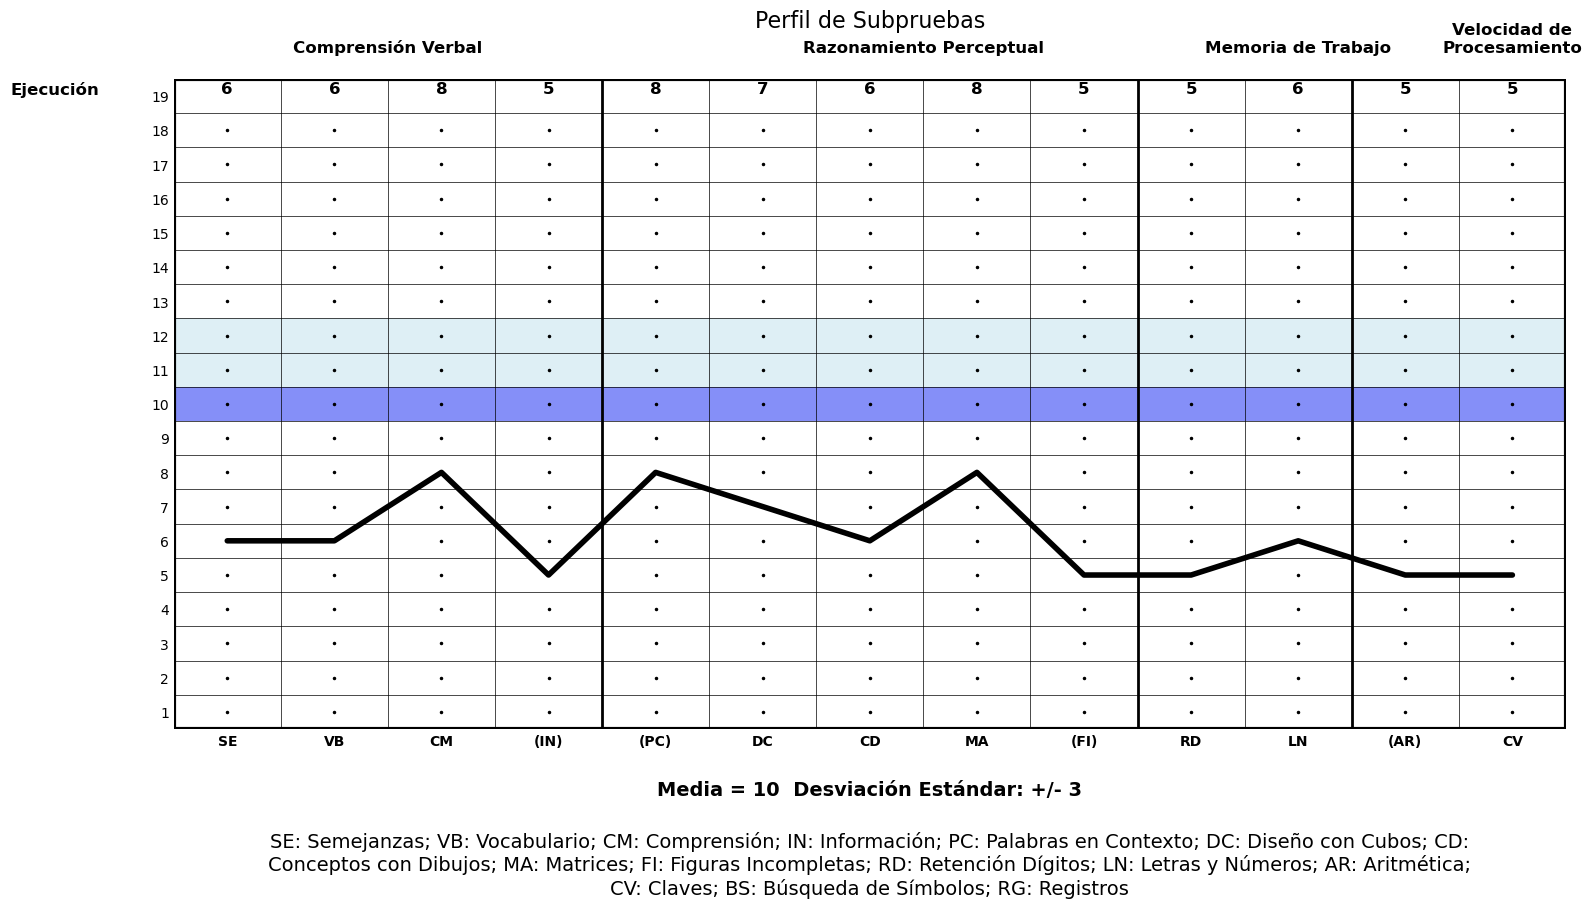

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# Define the data points for the profile line
# Based on the execution row values: 6, 6, 8, 5, 8, 7, 6, 8, 5, 5, 6, 5, 5
execution_scores = [6, 6, 8, 5, 8, 7, 6, 8, 5, 5, 6, 5, 5]

# Define x positions for each subtest
x_positions = np.arange(len(execution_scores))

# Set up the grid
ax.set_xlim(-0.5, len(execution_scores) - 0.5)
ax.set_ylim(0.5, 19.5)

# Create the main grid
for i in range(20):
    ax.axhline(y=i+0.5, color='black', linewidth=0.5)

for i in range(len(execution_scores) + 1):
    ax.axvline(x=i-0.5, color='black', linewidth=0.5)

# Add thicker lines to separate sections
section_breaks = [4, 9, 11]  # After PC, FI, AR
for break_pos in section_breaks:
    ax.axvline(x=break_pos-0.5, color='black', linewidth=2)

# Add shaded regions (average range) - Blue shaded area from 9-12
for i in range(len(execution_scores)):
    rect = patches.Rectangle((i-0.5, 9.5), 1, 3, linewidth=0, 
                           facecolor='lightblue', alpha=0.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((i-0.5, 9.5), 1, 1, linewidth=0, 
                           facecolor='blue', alpha=0.4)
    ax.add_patch(rect)

# Plot the profile line
ax.plot(x_positions, execution_scores, 'k-', linewidth=4, marker='o', 
        markersize=0, solid_capstyle='round')

# Set up the y-axis
y_ticks = list(range(1, 20))
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)

# Set up the x-axis with subtest abbreviations
subtest_labels = ['SE', 'VB', 'CM', '(IN)', '(PC)', 'DC', 'CD', 'MA', '(FI)', 
                 'RD', 'LN', '(AR)', 'CV']
ax.set_xticks(x_positions)
ax.set_xticklabels(subtest_labels, fontsize=10, fontweight='bold')

# Add section headers
section_headers = ['Comprensión Verbal', 'Razonamiento Perceptual', 
                  'Memoria de Trabajo', 'Velocidad de\nProcesamiento']
section_positions = [1.5, 6.5, 10, 12]

for i, (header, pos) in enumerate(zip(section_headers, section_positions)):
    ax.text(pos, 20.2, header, ha='center', va='bottom', fontsize=12, 
            fontweight='bold')

# Add execution scores at the top
for i, score in enumerate(execution_scores):
    ax.text(i, 19.2, str(score), ha='center', va='center', fontsize=12, 
            fontweight='bold')

# Add "Ejecución" label
ax.text(-1.2, 19.2, 'Ejecución', ha='right', va='center', fontsize=12, 
        fontweight='bold')

# Add title
ax.text(
    6, 21.2, 'Perfil de Subpruebas',
    ha='center', va='center',
    fontsize=16,
    fontname='Calibri'
)

# Add dots in empty cells
for y in range(1, 19):
    for x in range(len(execution_scores)):
        # Don't place dots where the line passes through
        if y != execution_scores[x]:
            ax.plot(x, y, 'k.', markersize=3)

# Add bottom text
bottom_text1 = "Media = 10  Desviación Estándar: +/- 3"
ax.text(6, -1, bottom_text1, ha='center', va='top', fontsize=14, fontweight='bold')

bottom_text2 = ("SE: Semejanzas; VB: Vocabulario; CM: Comprensión; IN: Información; PC: Palabras en Contexto; DC: Diseño con Cubos; CD:\n"
               "Conceptos con Dibujos; MA: Matrices; FI: Figuras Incompletas; RD: Retención Dígitos; LN: Letras y Números; AR: Aritmética;\n"
               "CV: Claves; BS: Búsqueda de Símbolos; RG: Registros")

ax.text(6, -2.5, bottom_text2, ha='center', va='top', fontsize=14)

# Remove axis spines except for the outer border
for spine in ax.spines.values():
    spine.set_visible(False)

# Add outer border
border = patches.Rectangle((-0.5, 0.5), len(execution_scores), 19, 
                          linewidth=3, edgecolor='black', facecolor='none')
ax.add_patch(border)

# Remove tick marks
ax.tick_params(length=0)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, top=0.85)

plt.show()

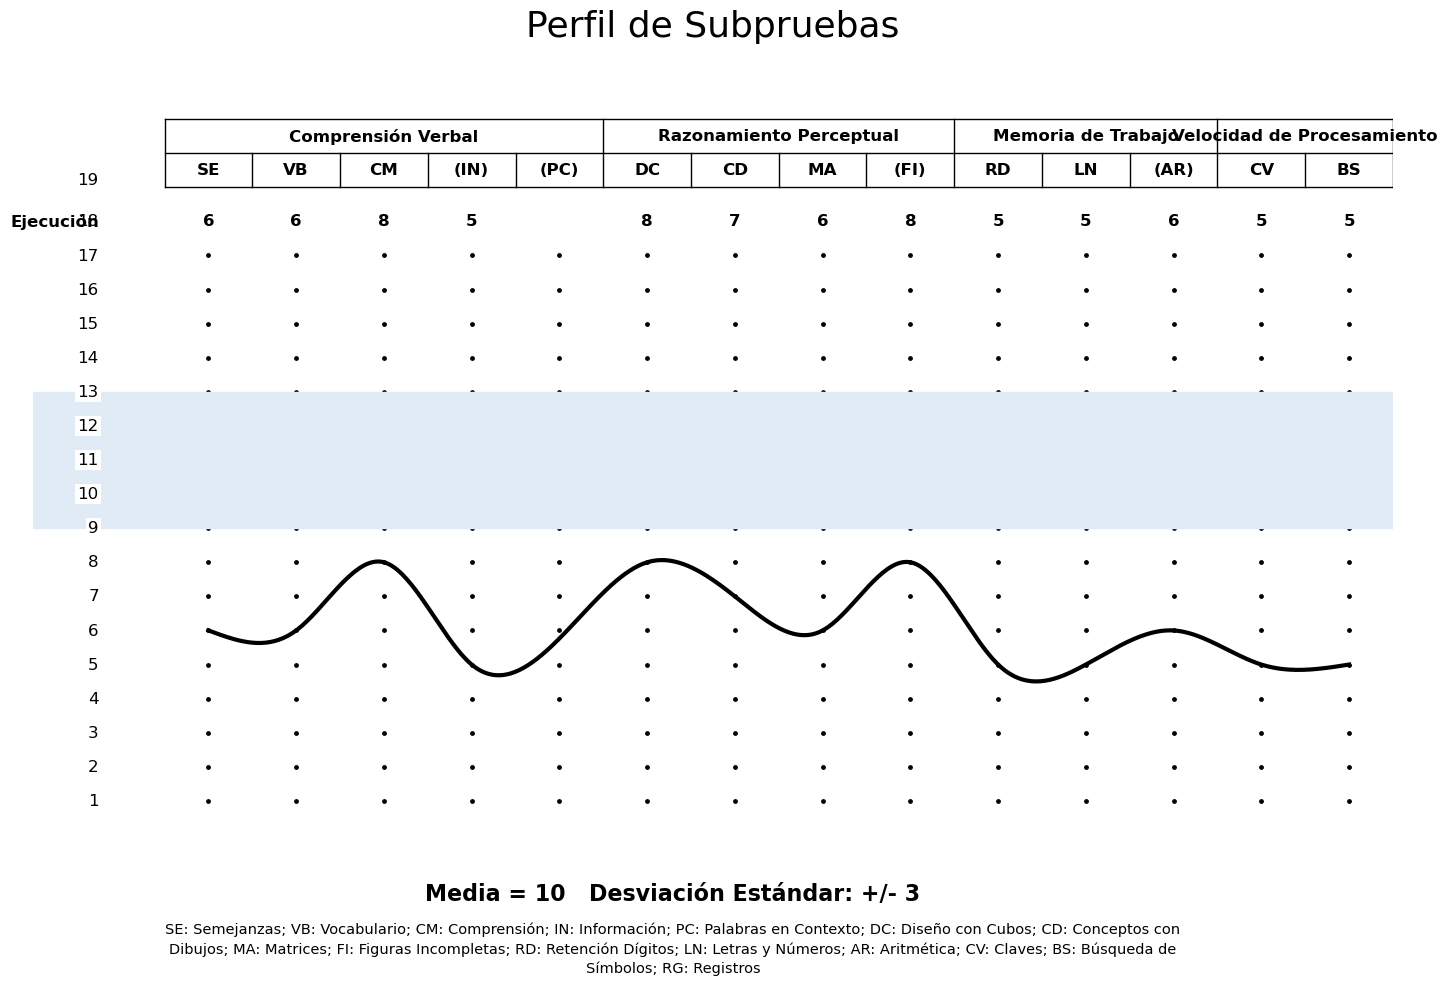

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import textwrap

# --- 1. Data Definition ---
# The scores for the 13 sub-tests that are plotted.
scores = [6, 6, 8, 5, 8, 7, 6, 8, 5, 5, 6, 5, 5]

# The x-coordinates for the scores, correctly skipping the empty column (PC).
plot_x_coords = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
total_cols = 14

# Data for the text in the header table.
subtest_labels = ['SE', 'VB', 'CM', '(IN)', '(PC)', 'DC', 'CD', 'MA', '(FI)', 'RD', 'LN', '(AR)', 'CV', 'BS']
score_text_list = ['6', '6', '8', '5', '', '8', '7', '6', '8', '5', '5', '6', '5', '5']
main_headers = {
    'Comprensión Verbal': (5, 2.0),
    'Razonamiento Perceptual': (4, 6.5),
    'Memoria de Trabajo': (3, 10.0),
    'Velocidad de Procesamiento': (2, 12.5)
}

# The full text for the legend at the bottom of the chart.
legend_text = "SE: Semejanzas; VB: Vocabulario; CM: Comprensión; IN: Información; PC: Palabras en Contexto; DC: Diseño con Cubos; CD: Conceptos con Dibujos; MA: Matrices; FI: Figuras Incompletas; RD: Retención Dígitos; LN: Letras y Números; AR: Aritmética; CV: Claves; BS: Búsqueda de Símbolos; RG: Registros"
wrapped_legend = '\n'.join(textwrap.wrap(legend_text, width=140))


# --- 2. Figure and Axes Setup ---
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set axis limits to provide space for the custom header and labels.
ax.set_xlim(-2.0, total_cols - 0.5)
ax.set_ylim(0, 22.0)

# Hide all default axes elements for a completely custom look.
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
ax.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False)


# --- 3. Plotting Core Visual Elements ---
# Main title (not bold).
ax.set_title("Perfil de Subpruebas", fontsize=26, pad=35, fontweight='normal')

# Background grid of dots.
x_grid, y_grid = np.meshgrid(np.arange(total_cols), np.arange(1, 18))
ax.scatter(x_grid, y_grid, c='black', s=6, zorder=0)

# Light blue shaded area for standard deviation.
ax.axhspan(9, 13, color='#e1ebf5', zorder=1)

# Smooth curve connecting the data points.
spline = CubicSpline(plot_x_coords, scores, bc_type='natural')
x_smooth = np.linspace(min(plot_x_coords), max(plot_x_coords), 500)
y_smooth = spline(x_smooth)
ax.plot(x_smooth, y_smooth, color='black', linewidth=3, zorder=10)


# --- 4. Manually Drawing the Table Header and Labels ---
# Define Y-coordinates for the horizontal lines of the header.
H_TOP = 21.0
H_MID = 20.0
H_BOT = 19.0
X_START = -0.5
X_END = 13.5

# Draw the main box outline and central horizontal line.
ax.plot([X_START, X_END], [H_TOP, H_TOP], c='k', lw=1)
ax.plot([X_START, X_END], [H_MID, H_MID], c='k', lw=1)
ax.plot([X_START, X_END], [H_BOT, H_BOT], c='k', lw=1)
ax.plot([X_START, X_START], [H_BOT, H_TOP], c='k', lw=1)
ax.plot([X_END, X_END], [H_BOT, H_TOP], c='k', lw=1)

# Draw main vertical dividers (full height of the box).
main_dividers = [4.5, 8.5, 11.5]
for x_div in main_dividers:
    ax.plot([x_div, x_div], [H_BOT, H_TOP], c='k', lw=1)

# Draw minor vertical dividers (bottom part of the box only).
for i in range(13):
    if i + 0.5 not in main_dividers:
        ax.plot([i + 0.5, i + 0.5], [H_BOT, H_MID], c='k', lw=1)

# Place text for the main headers.
for header, (_, x_pos) in main_headers.items():
    ax.text(x_pos, (H_MID + H_TOP) / 2, header, ha='center', va='center', fontsize=12, fontweight='bold')

# Place text for the sub-test abbreviations.
for i, label in enumerate(subtest_labels):
    ax.text(i, (H_BOT + H_MID) / 2, label, ha='center', va='center', fontsize=12, fontweight='bold')

# --- 5. Manually Drawing the Y-Axis and Score Row ---
y_label_x = -1.25 # X-position for the Y-axis labels.

# Place the "Ejecución" and score labels.
ax.text(y_label_x, 18.0, 'Ejecución', ha='right', va='center', fontsize=12, fontweight='bold')
for i, score in enumerate(score_text_list):
    ax.text(i, 18.0, score, ha='center', va='center', fontsize=12, fontweight='bold')

# Place the Y-axis numeric labels (1-19).
for y_val in range(1, 18):
    # Add a white box behind labels in the shaded area to make them visible.
    if 9 <= y_val <= 13:
        bbox_props = dict(boxstyle="square,pad=0.15", fc="white", ec="none")
        ax.text(y_label_x, y_val, str(y_val), ha='right', va='center', fontsize=12, bbox=bbox_props)
    else:
        ax.text(y_label_x, y_val, str(y_val), ha='right', va='center', fontsize=12)

# Place the top two Y-axis labels separately for alignment.
ax.text(y_label_x, 18, '18', ha='right', va='center', fontsize=12)
ax.text(y_label_x, 19, '19', ha='right', va='bottom', fontsize=12) # Align to bottom to match image.


# --- 6. Add Footer and Legend ---
# "Media / Desviación Estándar" text.
plt.figtext(0.5, 0.085, "Media = 10   Desviación Estándar: +/- 3", ha="center", fontsize=16, fontweight='bold')

# Detailed legend text at the very bottom.
plt.figtext(0.5, 0.01, wrapped_legend, ha="center", fontsize=10.5, va='bottom', linespacing=1.4)


# --- 7. Final Adjustments and Display ---
# Adjust subplot parameters to give some padding and prevent labels from being cut off.
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.15)

# Display the final plot.
plt.show()

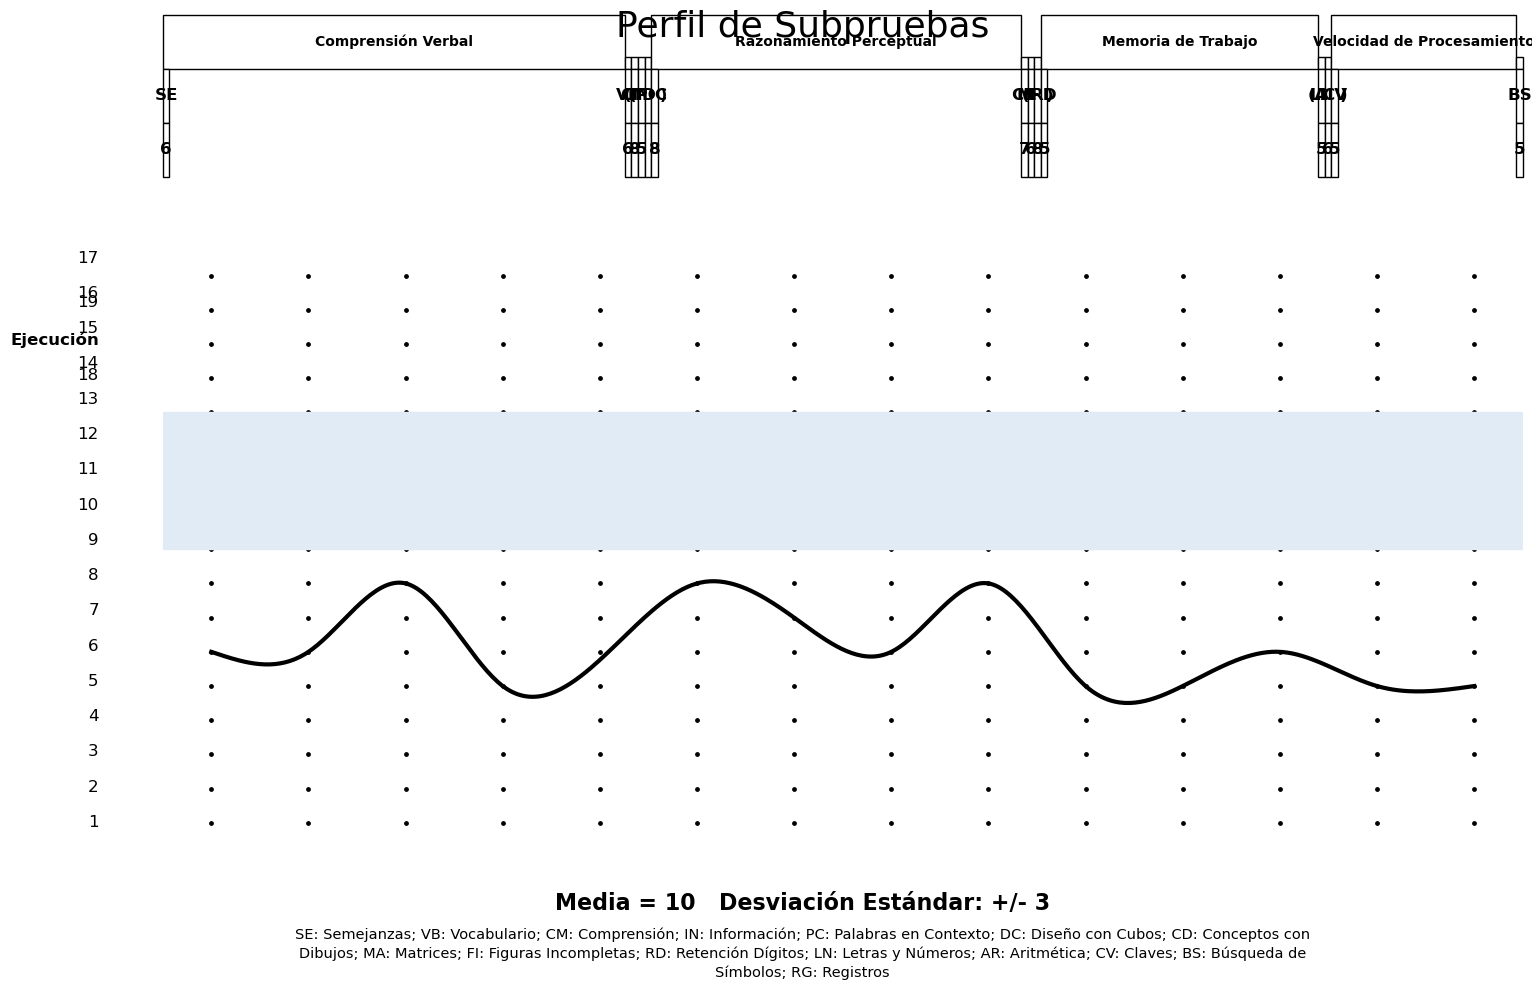

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import textwrap

# --- 1. Data and Configuration ---
# Plot data
scores = [6, 6, 8, 5, 8, 7, 6, 8, 5, 5, 6, 5, 5]
plot_x_coords = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13]
total_cols = 14

# Table content
main_headers = ['Comprensión Verbal', 'Razonamiento Perceptual', 'Memoria de Trabajo', 'Velocidad de Procesamiento']
subtest_labels = ['SE', 'VB', 'CM', '(IN)', '(PC)', 'DC', 'CD', 'MA', '(FI)', 'RD', 'LN', '(AR)', 'CV', 'BS']
score_text_list = ['6', '6', '8', '5', '', '8', '7', '6', '8', '5', '5', '6', '5', '5']

# Footer text
legend_text = "SE: Semejanzas; VB: Vocabulario; CM: Comprensión; IN: Información; PC: Palabras en Contexto; DC: Diseño con Cubos; CD: Conceptos con Dibujos; MA: Matrices; FI: Figuras Incompletas; RD: Retención Dígitos; LN: Letras y Números; AR: Aritmética; CV: Claves; BS: Búsqueda de Símbolos; RG: Registros"
wrapped_legend = '\n'.join(textwrap.wrap(legend_text, width=140))


# --- 2. Figure and Axes Setup ---
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Set axis limits for the plot area and hide them
ax.set_xlim(-0.5, total_cols - 0.5)
ax.set_ylim(0.5, 19.5)
ax.axis('off')

# --- 3. Plot the Core Visuals (Curve, Dots, Shaded Area) ---
# Background grid of dots
x_grid, y_grid = np.meshgrid(np.arange(total_cols), np.arange(1, 18))
ax.scatter(x_grid, y_grid, c='black', s=6, zorder=0)

# Light blue shaded area for standard deviation
ax.axhspan(9, 13, color='#e1ebf5', zorder=1)

# Smooth curve connecting the data points
spline = CubicSpline(plot_x_coords, scores, bc_type='natural')
x_smooth = np.linspace(min(plot_x_coords), max(plot_x_coords), 500)
y_smooth = spline(x_smooth)
ax.plot(x_smooth, y_smooth, color='black', linewidth=3, zorder=10)


# --- 4. Create the Table using matplotlib.table ---
# This table will be placed *above* the plot area (ax) using figure coordinates
# Prepare table data (3 rows: main headers, sub-tests, scores)
cell_text = [
    [''] * total_cols, # Placeholder for merged main headers
    subtest_labels,
    score_text_list
]

# Create the table
table = ax.table(
    cellText=cell_text,
    cellLoc='center',
    loc='bottom', # Place the table below the plot's origin
    bbox=[0, 1.02, 1, 0.25] # Manually position and size the table [left, bottom, width, height]
)

# --- Customize the table appearance ---
table.auto_set_font_size(False)
table.set_fontsize(12)

# Make all cell edges visible and black
for key, cell in table.get_celld().items():
    cell.set_edgecolor('k')
    cell.set_linewidth(1)
    
# Style the score and subtest rows
for i in range(total_cols):
    table[(1, i)].set_text_props(weight='bold')
    table[(2, i)].set_text_props(weight='bold')
    table[(1, i)].set_height(0.1) # Set specific heights
    table[(2, i)].set_height(0.1)

# Merge and style the main header cells
table[0, 0].visible_edges = ''
table.add_cell(0, 0, width=5, height=0.1, text=main_headers[0], loc='center')
table.add_cell(0, 5, width=4, height=0.1, text=main_headers[1], loc='center')
table.add_cell(0, 9, width=3, height=0.1, text=main_headers[2], loc='center')
table.add_cell(0, 12, width=2, height=0.1, text=main_headers[3], loc='center')

# Bold the text for the new merged cells
for i in [0, 5, 9, 12]:
    table[(0, i)].set_text_props(weight='bold')

# --- 5. Add All Text Labels (Titles, Axes) ---
# Main title
fig.suptitle("Perfil de Subpruebas", fontsize=26, y=0.98)

# "Ejecución" and Y-axis labels using figure coordinates to place them precisely
fig.text(0.06, 0.65, 'Ejecución', ha='right', va='center', fontsize=12, weight='bold')
fig.text(0.06, 0.615, '18', ha='right', va='center', fontsize=12)
fig.text(0.06, 0.68, '19', ha='right', va='bottom', fontsize=12)

# Y-axis labels from 1 to 17
for y_val in range(1, 18):
    # Map data coordinate to figure coordinate for precise placement
    y_fig_coord = np.interp(y_val, ax.get_ylim(), [0.15, 0.82])
    # Add a white box behind labels in the shaded area
    if 9 <= y_val <= 13:
        bbox_props = dict(boxstyle="square,pad=0.15", fc="white", ec="none")
        fig.text(0.06, y_fig_coord, str(y_val), ha='right', va='center', fontsize=12, bbox=bbox_props)
    else:
        fig.text(0.06, y_fig_coord, str(y_val), ha='right', va='center', fontsize=12)

# --- 6. Add Footer ---
plt.figtext(0.5, 0.08, "Media = 10   Desviación Estándar: +/- 3", ha="center", fontsize=16, fontweight='bold')
plt.figtext(0.5, 0.01, wrapped_legend, ha="center", fontsize=10.5, va='bottom', linespacing=1.4)

# --- 7. Final Adjustments and Display ---
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.8)
plt.show()